In [2]:
import cobra
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# Load the model -- Elad recommends iML1515
coli_model = cobra.io.read_sbml_model("../models/iML1515.xml")

# Gurobi is default, appears to be slower? 
coli_model.solver = 'glpk'

Set parameter Username


Academic license - for non-commercial use only - expires 2024-10-03


In [3]:
coli_model.slim_optimize()

0.8769972144269896

In [4]:
# Set up a medium without C or electron acceptors
my_medium = dict(coli_model.medium)
my_medium['EX_glc__D_e'] = 0 
my_medium['EX_o2_e'] = 0

In [5]:
# List of electron acceptors to test
e_acceptors = {
    'NO3': 'EX_no3_e',
    'O2': 'EX_o2_e',
    #'fumarate': 'EX_fum_e',
    'TMAO': 'EX_tmao_e',
    'DMSO': 'EX_dmso_e',
    'fermentation': None,
}

# Get the C exchanges from the model
c_exchanges = {}
for e in coli_model.exchanges:
    for m in e.metabolites.keys():
        if m.elements.get('C', 0) > 0:
            c_exchanges[e.id] = m.name

# Manual list of C sources to try
c_exchanges2test = [
    dict(name='glucose', type='sugar', ex_id='EX_glc__D_e'),
    dict(name='acetate', type='organic acid', ex_id='EX_ac_e'),
    dict(name='glycerol', type='sugar alcohol', ex_id='EX_glyc_e'),
    dict(name='succinate', type='organic acid', ex_id='EX_succ_e'),
    dict(name='fumarate', type='organic acid', ex_id='EX_fum_e'),
    dict(name='pyruvate', type='organic acid', ex_id='EX_pyr_e'),
    dict(name='lactate', type='organic acid', ex_id='EX_lac__D_e'),
    dict(name='ethanol', type='alcohol', ex_id='EX_etoh_e'),
    dict(name='alanine', type='amino acid', ex_id='EX_ala__L_e'),
    dict(name='glycine', type='amino acid', ex_id='EX_gly_e'),
    dict(name='serine', type='amino acid', ex_id='EX_ser__L_e'),
    dict(name='threonine', type='amino acid', ex_id='EX_thr__L_e'),
    dict(name='valine', type='amino acid', ex_id='EX_val__L_e'),
    dict(name='leucine', type='amino acid', ex_id='EX_leu__L_e'),
    dict(name='isoleucine', type='amino acid', ex_id='EX_ile__L_e'),
    dict(name='cytosine', type='nucleobase', ex_id='EX_cytd_e'),
    dict(name='uracil', type='nucleobase', ex_id='EX_ura_e'),
    dict(name='adenine', type='nucleobase', ex_id='EX_adn_e'),
    dict(name='guanine', type='nucleobase', ex_id='EX_gua_e'),
    dict(name='thymine', type='nucleobase', ex_id='EX_thym_e'),
    dict(name='uridine', type='nucleoside', ex_id='EX_uri_e'),
    dict(name='sucrose', type='sugar', ex_id='EX_sucr_e'),
    dict(name='trehalose', type='sugar', ex_id='EX_tre_e'),
    dict(name='maltose', type='sugar', ex_id='EX_malt_e'),
    dict(name='gluconate', type='sugar acid', ex_id='EX_gal_e'),
    dict(name='glucuronate', type='sugar acid', ex_id='EX_glcur_e'),
    dict(name='galacturonate', type='sugar acid', ex_id='EX_galur_e'),
    dict(name='glucarate', type='sugar acid', ex_id='EX_glcr_e'),
    dict(name='rhamnose', type='sugar', ex_id='EX_rmn_e'),
    dict(name='arabinose', type='sugar', ex_id='EX_arab__L_e'),
    dict(name='xylose', type='sugar', ex_id='EX_xyl__D_e'),
    dict(name='fucose', type='sugar', ex_id='EX_fuc__L_e'),
    dict(name='mannose', type='sugar', ex_id='EX_man_e'),
    dict(name='fructose', type='sugar', ex_id='EX_fru_e'),
    dict(name='sorbitol', type='sugar alcohol', ex_id='EX_sbt__D_e'),
    dict(name='hexadecenoate', type='fatty acid', ex_id='EX_hdcea_e'),
    dict(name='tetradecenoate', type='fatty acid', ex_id='EX_ttdcea_e'),
    dict(name='tetradecanoate', type='fatty acid', ex_id='EX_ttdca_e'),
    dict(name='octadecanoate', type='fatty acid', ex_id='EX_ocdca_e'),
    dict(name='octadecenoate', type='fatty acid', ex_id='EX_ocdcea_e'),
    dict(name='hexanoate', type='fatty acid', ex_id='EX_hxa_e'),
    dict(name='decanoate', type='fatty acid', ex_id='EX_dca_e'),
    dict(name='octanoate', type='fatty acid', ex_id='EX_octa_e'),
    dict(name='hexadecanoate', type='fatty acid', ex_id='EX_hdca_e'),
    dict(name='dodecanoate', type='fatty acid', ex_id='EX_ddca_e'),
    dict(name='3-hydroxypropanoate', type='organic acid', ex_id='EX_3hpp_e'),
    dict(name='phenylacealdehyde', type='aromatic', ex_id='EX_pacald_e'),
    dict(name='phenylpropanoate', type='aromatic', ex_id='EX_pppn_e'),
    dict(name='dopamine', type='aromatic', ex_id='EX_dopa_e'),
    dict(name='tyramine', type='aromatic', ex_id='EX_tym_e'),
]


# Check that all C sources are in the model
for c in c_exchanges2test:
    if c['ex_id'] not in c_exchanges:
        print(c['name'], 'not found')

In [6]:
for ex_id, ex_name in c_exchanges.items():
    print(ex_id, ex_name)


EX_co2_e CO2 CO2
EX_met__L_e L-Methionine
EX_metsox_S__L_e L-Methionine Sulfoxide
EX_acgam_e N-Acetyl-D-glucosamine
EX_cellb_e Cellobiose
EX_crn_e L-Carnitine
EX_hxan_e Hypoxanthine
EX_ile__L_e L-Isoleucine
EX_chol_e Choline C5H14NO
EX_lac__L_e L-Lactate
EX_leu__L_e L-Leucine
EX_glcn_e D-Gluconate
EX_orn_e Ornithine
EX_gln__L_e L-Glutamine
EX_pro__L_e L-Proline
EX_glyc_e Glycerol
EX_man_e D-Mannose
EX_ade_e Adenine
EX_4abut_e 4-Aminobutanoate
EX_ac_e Acetate
EX_akg_e 2-Oxoglutarate
EX_ala__L_e L-Alanine
EX_arg__L_e L-Arginine
EX_asp__L_e L-Aspartate
EX_pyr_e Pyruvate
EX_succ_e Succinate
EX_thymd_e Thymidine C10H14N2O5
EX_rib__D_e D-Ribose
EX_tyr__L_e L-Tyrosine
EX_cytd_e Cytidine
EX_dcyt_e Deoxycytidine
EX_fum_e Fumarate
EX_sbt__D_e D-Sorbitol
EX_glu__L_e L-Glutamate
EX_gua_e Guanine
EX_btn_e Biotin
EX_ptrc_e Putrescine
EX_spmd_e Spermidine
EX_thym_e Thymine C5H6N2O2
EX_xtsn_e Xanthosine
EX_glc__D_e D-Glucose
EX_alltn_e Allantoin
EX_ura_e Uracil
EX_val__L_e L-Valine
EX_xan_e Xanthine
E

In [49]:
# Run FBA for all combinations of C and e- acceptors
growth_data = []
for i, (e, e_ex) in enumerate(e_acceptors.items()):   
    for j, c_ex in enumerate(c_exchanges2test):
        tmp_medium = dict(my_medium)
        tmp_medium[c_ex['ex_id']] = 10.0

        # None signals fermentation (no e- acceptor)
        if e_ex is not None:
            tmp_medium[e_ex] = 1000.0

        tmp_model = coli_model.copy()
        tmp_model.medium = tmp_medium

        # Calculate the model's growth rate and save
        opt = tmp_model.optimize()
        mu = opt.objective_value

        mu = tmp_model.slim_optimize()
        growth_data.append(dict(
            e_acceptor=e,
            c_source=c_ex['name'],
            c_source_type=c_ex['type'],
            growth_rate_hr=mu,
            maintenance=opt.fluxes['ATPM'],
        ))

/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/opt/miniconda3/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning

In [50]:
# Convert to a dataframe
long_growth_df = pd.DataFrame(growth_data)

# Binarize growth 
long_growth_df['grows'] = long_growth_df.growth_rate_hr > 0.01
growth_mat_df = long_growth_df.pivot_table(
    index='c_source_type,c_source'.split(','), 
    columns='e_acceptor', values='growth_rate_hr').reset_index()
growth_mat_df = growth_mat_df.fillna(0)

# Drop C sources with no growth at all
no_grow = (growth_mat_df == 0).all(axis=1)
growth_mat_df = growth_mat_df.drop(no_grow.index[no_grow]).sort_values('c_source_type').set_index(
    'c_source_type,c_source'.split(','))

# Save the growth matrix
growth_mat_df.to_csv('../output/iML1515_growth_rate_matrix.csv')

# Make a binary version of the growth matrix for plotting
binary_growth_mat_df = growth_mat_df > 0.001

In [54]:
long_growth_df[long_growth_df.maintenance > 6.86]

,e_acceptor,c_source,c_source_type,growth_rate_hr,maintenance,grows


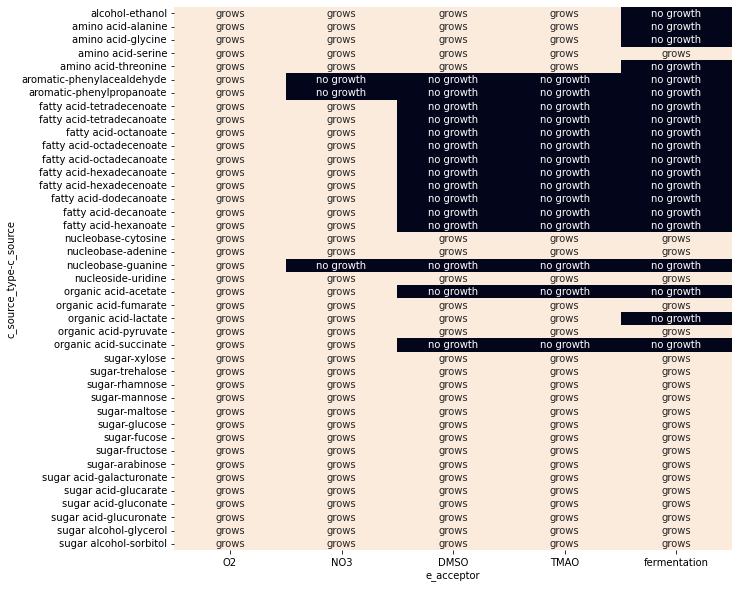

In [51]:
cols = 'O2,NO3,DMSO,TMAO,fermentation'.split(',')
cmap = sns.color_palette('cividis', as_cmap=True)
cmap.set_bad('white')

plt.figure(figsize=(10, 10))
annot = binary_growth_mat_df.replace({True: 'grows', False: 'no growth'})
sns.heatmap(binary_growth_mat_df[cols], annot=annot[cols], cbar=False, fmt='',
            xticklabels=cols)
plt.savefig('../output/iML1515_growth_mat.png', dpi=300, bbox_inches='tight', facecolor='white')

In [3]:
# Load the model -- Elad recommends iML1515
coli_model = cobra.io.read_sbml_model("../models/iML1515.xml")
coli_model.solver = 'glpk'
coli_model.reactions.ATPM

Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-03


Reaction identifier,ATPM
Name,ATP maintenance requirement
Memory address,0x7f8386138dc0
Stoichiometry,atp_c + h2o_c --> adp_c + h_c + pi_c ATP C10H12N5O13P3 + H2O H2O --> ADP C10H12N5O10P2 + H+ + Phosphate
GPR,
Lower bound,6.86
Upper bound,1000.0


In [45]:
b_ubs = np.hstack([np.arange(6.87, 10, 0.1), np.logspace(1,3,50)])
print(b_ubs)
lams = np.zeros_like(b_ubs)
for i, ub in enumerate(b_ubs):
    coli_model.reactions.ATPM.upper_bound = ub
    opt = coli_model.optimize()
    gr = opt.objective_value
    lams[i] = gr

lams

[   6.87          6.97          7.07          7.17          7.27
    7.37          7.47          7.57          7.67          7.77
    7.87          7.97          8.07          8.17          8.27
    8.37          8.47          8.57          8.67          8.77
    8.87          8.97          9.07          9.17          9.27
    9.37          9.47          9.57          9.67          9.77
    9.87          9.97         10.           10.98541142   12.06792641
   13.25711366   14.56348478   15.9985872    17.57510625   19.30697729
   21.20950888   23.29951811   25.59547923   28.11768698   30.88843596
   33.93221772   37.2759372    40.94915062   44.98432669   49.41713361
   54.28675439   59.63623317   65.51285569   71.9685673    79.06043211
   86.85113738   95.40954763  104.81131342  115.13953993  126.48552169
  138.94954944  152.64179672  167.68329368  184.20699693  202.35896477
  222.29964825  244.20530945  268.26957953  294.70517026  323.74575428
  355.64803062  390.69399371  429.19342601

array([0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699721,
       0.87699721, 0.87699721, 0.87699721, 0.87699721, 0.87699

In [129]:
core_model = cobra.io.read_sbml_model("../models/ECC2_extended_core_updated.xml")
core_model.solver = 'glpk'
core_model.compartments = {'c': 'Internal_Species', 'e': 'External_Species'}

# Set the ATP maintenance to non-zero
core_model.reactions.ATPM.lower_bound = 5

# Add a serine exchange
#serine_e = cobra.Metabolite('ser_DASH_L_e', name='L-serine', compartment='e')
#serine_ex = cobra.Reaction(id='EX_glc_LPAREN_e_RPAREN_', name='R_EX_glc_LPAREN_e_RPAREN_')
#serine_ex.add_metabolites({serine_e: -1, core_model.metabolites.ser_DASH_L_c: 1})
#core_model.add_metabolites(serine_e)
#core_model.add_reactions([serine_ex])
# Allows for L-serine to be supplied to the core model
#core_model.add_boundary(serine_e, type='exchange', reaction_id='EX_ser_DASH_L_ex', lb=0, ub=0)


Adding exchange reaction EX_Biomass with default bounds for boundary metabolite: Biomass.
Adding exchange reaction EX_ca2_ex with default bounds for boundary metabolite: ca2_ex.
Adding exchange reaction EX_cl_ex with default bounds for boundary metabolite: cl_ex.
Adding exchange reaction EX_co2_ex with default bounds for boundary metabolite: co2_ex.
Adding exchange reaction EX_cobalt2_ex with default bounds for boundary metabolite: cobalt2_ex.
Adding exchange reaction EX_cu2_ex with default bounds for boundary metabolite: cu2_ex.
Adding exchange reaction EX_fe2_ex with default bounds for boundary metabolite: fe2_ex.
Adding exchange reaction EX_fe3_ex with default bounds for boundary metabolite: fe3_ex.
Adding exchange reaction EX_glc_DASH_D_ex with default bounds for boundary metabolite: glc_DASH_D_ex.
Adding exchange reaction EX_glyc_ex with default bounds for boundary metabolite: glyc_ex.
Adding exchange reaction EX_h_ex with default bounds for boundary metabolite: h_ex.
Adding excha

In [130]:
my_medium = core_model.medium.copy()

# Base medium with no carbon and no e- acceptors
# Zero out all the carbon sources
c_sources = 'EX_glc_DASH_D_ex,EX_glyc_ex,EX_ac_ex,EX_succ_ex'.split(',')
for c_source in c_sources:
    my_medium[c_source] = 0

# Zero out all the electron acceptors
e_acceptors = 'EX_o2_ex'.split(',')
for e_acceptor in e_acceptors:
    my_medium[e_acceptor] = 0

my_medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


{'EX_Biomass': 1000.0,
 'EX_ca2_ex': 1000.0,
 'EX_cl_ex': 1000.0,
 'EX_co2_ex': 1000.0,
 'EX_cobalt2_ex': 1000.0,
 'EX_cu2_ex': 1000.0,
 'EX_fe2_ex': 1000.0,
 'EX_fe3_ex': 1000.0,
 'EX_glc_DASH_D_ex': 0,
 'EX_glyc_ex': 0,
 'EX_h_ex': 1000.0,
 'EX_h2o_ex': 1000.0,
 'EX_k_ex': 1000.0,
 'EX_mg2_ex': 1000.0,
 'EX_mn2_ex': 1000.0,
 'EX_mobd_ex': 1000.0,
 'EX_nh4_ex': 1000.0,
 'EX_ni2_ex': 1000.0,
 'EX_o2_ex': 0,
 'EX_pi_ex': 1000.0,
 'EX_so4_ex': 1000.0,
 'EX_succ_ex': 0,
 'EX_zn2_ex': 1000.0,
 'EX_ac_ex': 0,
 'EX_etoh_ex': 1000.0,
 'EX_for_ex': 1000.0,
 'EX_h2_ex': 1000.0,
 'EX_lac_ex': 1000.0,
 'EX_4CRSOL_ex': 1000.0,
 'EX_5DRIB_ex': 1000.0,
 'EX_AMOB_ex': 1000.0,
 'EX_MTHTHF_ex': 1000.0,
 'EX_meoh_ex': 1000.0}

In [131]:
growth_data_core = []
for c in c_sources:
    for e in e_acceptors + ['fermentation']:
        tmp_medium = my_medium.copy()
        tmp_medium[c] = 10
        if e != 'fermentation':
            tmp_medium[e] = 1000

        core_model.medium = tmp_medium
        opt = core_model.optimize()
        mu = opt.objective_value
        growth_data_core.append(dict(
            e_acceptor=e,
            c_source=c,
            growth_rate_hr=mu,
            maintenance=opt.fluxes['ATPM'],
        ))

core_results_df = pd.DataFrame(growth_data_core)

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the mos

In [132]:
core_results_df

,e_acceptor,c_source,growth_rate_hr,maintenance
0,EX_o2_ex,EX_glc_DASH_D_ex,9.750579e-01,5.0
1,fermentation,EX_glc_DASH_D_ex,2.691588e-01,5.0
2,EX_o2_ex,EX_glyc_ex,5.551688e-01,5.0
3,fermentation,EX_glyc_ex,5.809203e-16,5.0
4,EX_o2_ex,EX_ac_ex,2.367934e-01,5.0
5,fermentation,EX_ac_ex,1.368552e-17,5.0
6,EX_o2_ex,EX_succ_ex,4.847596e-01,5.0
7,fermentation,EX_succ_ex,2.089400e-16,5.0
